## Problems 8

In [ ]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import expon
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
sns.set()
%matplotlib inline
import statistics
import statsmodels.api as sm
x,y,z,c = symbols('x y z c')

In [ ]:
# Let us create a UDF which will enable us to shade areas under 
#the curve for t-distribution

def draw_t_score(x, df, cond, mu, sigma, title):
    y = stats.t.pdf(x, df, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(t, stats.t.pdf(t, df, mu, sigma))
    plt.title(title)
    plt.show()

In [ ]:
# Let us create a UDF which will enable us to shade areas 
# under the curve for standard normal distribution

def draw_z_score(x, cond, mu, sigma, title):
    y = stats.norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.yticks([])
    plt.fill_between(z, stats.norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

# 8. Regression

## Exam 2020

### Assignment 4 

Hydrocarbon emissions from cars are known to have decreased dramatically during the 2010s. A study
was conducted to compare the hydrocarbon emissions at idling speed, in parts per million (ppm), for
automobiles from 2010 and 2020. Fifty cars of each model year were randomly selected, and their
hydrocarbon emission levels were recorded. The data is displayed in ”HydroCarbonEmissions.xlsx”.

a. Determine estimates for the quartiles, average emission, standard deviation and variance of each
model year.


In [ ]:
df = pd.read_excel("HydroCarbonEmissions.xlsx")
df.head()

,2010s models,2020s models
0,113,12
1,490,187
2,688,389
3,630,195
4,179,55


In [ ]:
# Quartiles for 2010s models
display(Latex("For 2010 model:"))
display(Latex("$$Q_1 = {}$$".format(np.percentile(df['2010s models'], 25))))
display(Latex("$$Q_2 = {}$$".format(np.percentile(df['2010s models'], 50))))
display(Latex("$$Q_3 = {}$$".format(np.percentile(df['2010s models'], 75))))

# Quartiles for 2020 models
display(Latex("For 2020 model:"))
display(Latex("$$Q_1 = {}$$".format(np.percentile(df['2020s models'], 25))))
display(Latex("$$Q_2 = {}$$".format(np.percentile(df['2020s models'], 50))))
display(Latex("$$Q_3 = {}$$".format(np.percentile(df['2020s models'], 75))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
# Average emission for 2010s models (mu)
display(Latex("mu 2010 = {}".format(df['2010s models'].mean())))
display(Latex("mu 2020 = {}".format(df['2020s models'].mean())))

# Standard deviation and variance 
display(Latex("$$\sigma 2010 = {}$$".format(round(df['2010s models'].std(ddof=1), 2))))
display(Latex("$$\sigma^2 2010 = {}$$".format(round(df['2010s models'].var(ddof=1), 2))))
display(Latex("$$\sigma 2020 = {}$$".format(round(df['2020s models'].std(ddof=1), 2))))
display(Latex("$$\sigma^2 2020 = {}$$".format(round(df['2020s models'].var(ddof=1), 2))))
a = np.std(df['2010s models'], ddof =1)
a

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

b. Setup 95% confidence intervals for the mean of each model year, and accompany the intervals with
plots that display the rejection region

A 95.0 % confidence interval for the 2010 models is [340.1743 ; 443.0257]


<IPython.core.display.Latex object>

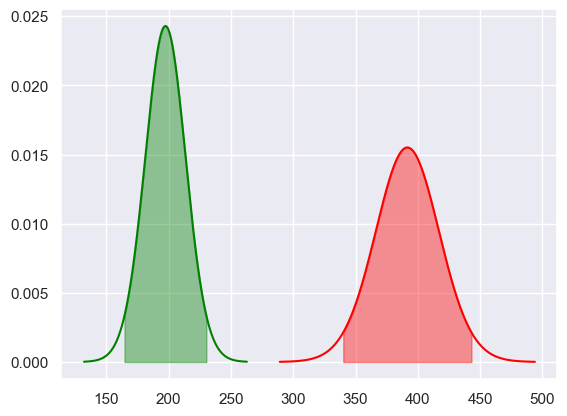

In [ ]:
n10 = len(df['2010s models'])
mean10 = np.mean(df['2010s models'])
standarderrormean10 = stats.sem(df['2010s models'])
Level = 0.95

# We are using t, because standard deviation is calculatd from sample, the true mean is not known
# n10-1 because of degree of freedom 
CI10 = stats.t.interval(Level,n10-1, loc=mean10, scale=standarderrormean10)

print('A ' + repr(Level*100) + ' % confidence interval for the 2010 models is [' + repr(round(CI10[0],4)) + ' ; '
      + repr(round(CI10[1],4)) + ']')

x10 = np.linspace(mean10-4*standarderrormean10, mean10+4*standarderrormean10, 1000)
z10 = np.linspace(CI10[0], CI10[1], 1000)
y10 = stats.t.pdf(x10,n10-1, mean10, standarderrormean10)
plt.plot(x10,y10, color = 'red')
# stats.t.pdf where x, df, loc and scale,df is n -1
# fill_between filss the area between 2 horizontal curves
plt.fill_between(z10, stats.t.pdf(z10,n10-1, mean10,standarderrormean10), color = 'red', alpha = 0.4)


n20 = len(df['2020s models'])
m20 = np.mean(df['2020s models'])
SE20 = stats.sem(df['2020s models'])

CI20 = stats.t.interval(Level, n20-1, loc=m20, scale=SE20)
display(Latex('A ' + repr(int(Level*100)) + ' % confidence interval for the sample mean of the 2020 models is ['+
              repr(round(CI20[0],3)) + ' ; ' + repr(round(CI20[1],3)) + ']'))

x20 = np.linspace(m20-4*SE20, m20+4*SE20, 1000)
z20 = np.linspace(CI20[0], CI20[1], 1000)
y20 = stats.t.pdf(x20,n20-1, m20, SE20)
plt.plot(x20,y20, color = 'green')
plt.fill_between(z20, stats.t.pdf(z20,n20-1, m20,SE20), color = 'green', alpha = 0.4)
plt.show()


c. Is it reasonable to assume that the emission of each model year is normally distributed? Explain
using plots and discussing skewness and kurtosis.


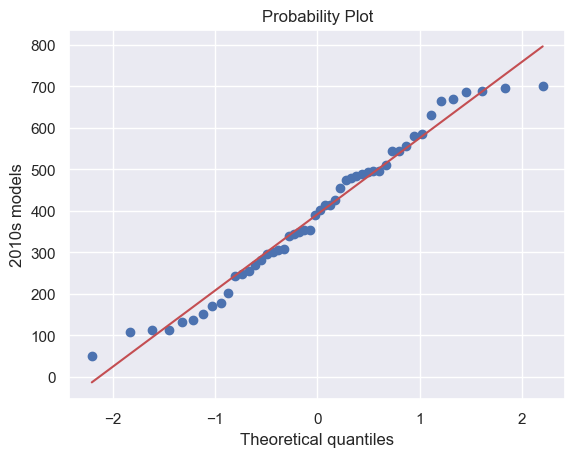

Skewness = 0.0092
Kurtosis = -0.9661
KurtosistestResult(statistic=-2.1476439423288998, pvalue=0.031742051781441266)


<AxesSubplot:title={'center':'Distribution 2010 models'}, ylabel='Density'>

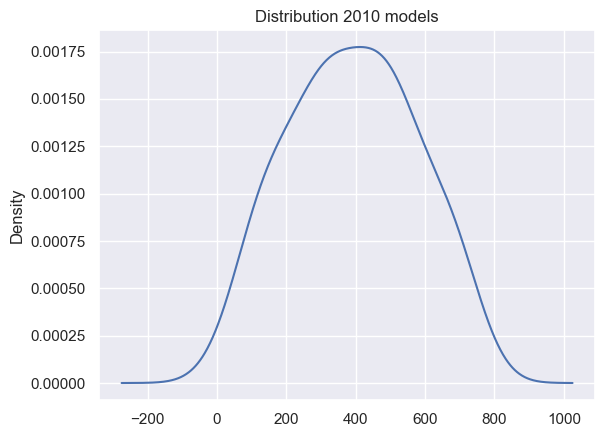

In [ ]:
stats.probplot(df['2010s models'], plot=plt)
plt.ylabel('2010s models')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['2010s models']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['2010s models']),4)))
print(stats.kurtosistest(df['2010s models']))
fig, ax = plt.subplots()
df['2010s models'].plot.kde(ax=ax, legend=False, title='Distribution 2010 models')

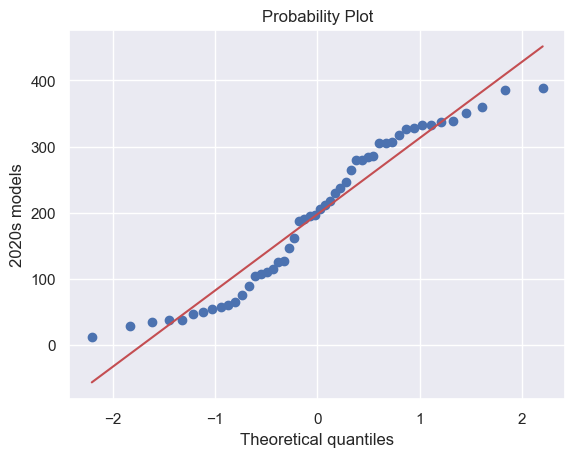

Skewness = -0.0345
Kurtosis = -1.379
KurtosistestResult(statistic=-4.936992202737803, pvalue=7.933664172540974e-07)


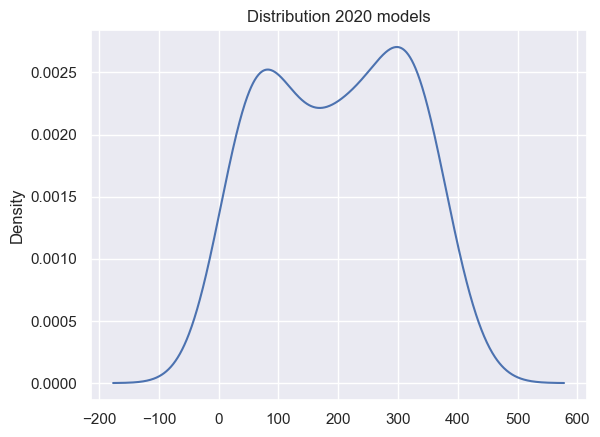

In [ ]:
stats.probplot(df['2020s models'], plot=plt)
plt.ylabel('2020s models')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['2020s models']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['2020s models']),4)))
print(stats.kurtosistest(df['2020s models']))
fig, ax = plt.subplots()
df['2020s models'].plot.kde(ax=ax, legend=False, title='Distribution 2020 models');

As can be seen, it is fair to assume that both datasets are normally distributed. The normal probability plots show distributions that almost perfectly follow the trendline. The distribution plot of the 2010 model is also perfectly bell-shaped, whereas the one for the 2020 models is acceptable so.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric which is the case for both datasets.

The KurtosisTest tests the null hypothesis that the kurtosis of the population from which the sample was drawn is
that of the normal distribution. We see we get significant p-value which would indicate the data is not normally distributed.

The p-value can be perceived as an oracle that judges our results. If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant and tends to be passed over in silence.

d. Setup a 99% confidence interval for the mean emission difference between the two model years and accompany the intervals with plots that display the rejection region.


A 99.0 % confidence interval for the mean difference of the models is [114.401 ; 273.919]


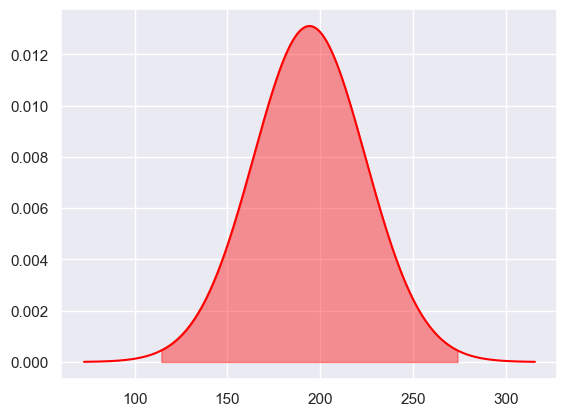

In [ ]:
diff = abs(mean10-m20)
#IMPORTANT
SE = np.sqrt(df['2010s models'].var(ddof=1)/n10 + df['2020s models'].var(ddof=1)/n20)
Level = 0.99

# We are using t, because standard deviation is calculatd from sample, the true mean is not known
# df is n sum -1 -1 because there are 2 populations and each has a degree of freedom  
CI = stats.t.interval(Level,(n10 + n20-1-1), loc=diff, scale=SE)

print('A ' + repr(Level*100) + ' % confidence interval for the mean difference of the models is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

x = np.linspace(diff-4*SE, diff+4*SE, 1000)
z = np.linspace(CI[0], CI[1], 1000)
y = stats.t.pdf(x,(n10 + n20 -1 -1), diff, SE)
plt.plot(x,y, color = 'red')
# stats.t.pdf where x, df, loc and scale,df is n sum -1 -1 because there are 2 populations and each has a degree of freedom 
# fill_between filss the area between 2 horizontal curves
plt.fill_between(z, stats.t.pdf(z,(n10+n20 -1-1), diff,SE), color = 'red', alpha = 0.4)

e. Is there significant evidence to support the claim that the mean emission difference between the
two model years differ from one another? 

If they do not differ, then the difference is 0

H0: Mean emission difference is 0

H1: Mean emission difference is not 0

In [ ]:
#IMPORTANT
alpha = 0.05
p = stats.t.cdf(diff, df=n10+n20-2, loc=0, scale=SE)
pvalue = 2*min(p, 1-p)
t_stat, p_value = stats.ttest_ind(df['2010s models'],df['2020s models'], equal_var=True) 
print(p_value)
if round(pvalue, 4) < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))


5.488988287259463e-09
Reject since p-value = 0.0 < 0.05


### Assignment 5

he dataset for this assignment is ”Wages and Work Hour.xlsx”. This workbook contains data on fulltime workers in East North Central United States from the March 1999 CPS. The objective is to determine
whether Education, Income, and Gender differ

Variable notes:

• Education Level: Group 1 has less than 13 years of education. Group 2 has between 13 and 15 years of education (both included). Group 3 has 16 years or more of education

• Income Group: Group 1 has less than or equal to $20, 000 in income. Group 2 has between $20, 000
and $48, 000 in income (both included). Group 3 has more than $48, 000 in income

 a. Create a contingency table, placing Gender on the vertical axis and Education Level on the horizontal axis, and test whether gender is independent of level of education.



In [ ]:
df = pd.read_excel("Wages_and_Work_Hours.xlsx")
df.head()

,Usual Hours Worked,Education (yrs),Education Level,Income Group,Income ($),Gender
0,40,13.0,2,2,44000,Male
1,35,12.0,1,1,12000,Female
2,70,11.0,1,3,54000,Male
3,40,16.0,3,3,48200,Male
4,38,12.0,1,2,24000,Male


In [ ]:
table = pd.crosstab(df['Gender'], df['Education Level'], margins=False)
display(table)

Education Level,1,2,3
Gender,,,
Female,1044,727,720
Male,1577,922,1060


In [ ]:
#Hypotesis
# H0: Gender is independent of level of education
# H1: Gender is not independent of level of education
alpha = 0.05
Chi2, pvalue, dof, ex = stats.chi2_contingency(table, correction=False)
#IMPORTANT
if round(pvalue, 4) < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))

Reject since p-value = 0.0173 < 0.05


b. Create a contingency table, placing Gender on the vertical axis and Income Group on the horizontal
axis, and test whether gender is independent of income

In [ ]:
table = pd.crosstab(df['Gender'], df['Income Group'], margins=False)
display(table)

alpha = 0.05
Chi2, pvalue, dof, ex = stats.chi2_contingency(table, correction=False)
#IMPORTANT
if round(pvalue, 4) < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))

Income Group,1,2,3
Gender,,,
Female,957,1202,332
Male,679,1651,1229


Reject since p-value = 0.0 < 0.05


c. Create a contingency table, placing Education Level on the vertical axis and Income Group on the
horizontal axis, and test whether Education Level is independent of Income Group.

In [ ]:
table = pd.crosstab(df['Education Level'], df['Income Group'], margins=False)
display(table)

alpha = 0.05
Chi2, pvalue, dof, ex = stats.chi2_contingency(table, correction=False)
#IMPORTANT
if round(pvalue, 4) < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))

Income Group,1,2,3
Education Level,,,
1,1025,1279,317
2,437,861,351
3,174,713,893


Reject since p-value = 0.0 < 0.05


### Assignment 6
State the null and alternative hypotheses to be used in testing the following claims and determine
generally where the rejection region is located (i.e. is it a right-, left- or two-tailed test):

There are three different types of hypothesis tests: Two-tailed test: The alternative hypothesis contains the “≠” sign. Left-tailed test: The alternative hypothesis contains the “<” sign. Right-tailed test: The alternative hypothesis contains the “>” sign.

a. The mean snowfall at Bygholm during the month of February is 21.8 centimeters.

The parameter of interest is the mean snowfall in Bygholm for February. 

H0: mu = 21.8cm
H1: mu != 21.8

Two tailed test

b. No more than 20% of the faculty at VIA are competent teachers.

Parameter of interest = proportion of competent teachers at VIA

H0: p ≤ 0.2
H1: p > 0.2

Right tailed test

c. On the average, children attend schools within 2.62 kilometres of their homes in Denmark.

The parameter of interest = average school proximity to homes of children

H0: mu ≤ 2.62
H1: mu > 2.62

Right tailed test

d. The proportion of voters favoring the incumbent in the upcoming American election is 0.38.

Parameter of interest = proprotion of voters favoring incubent in A election

H0: mu = 0.38
H1: mu != 0.38

Two tailed test

e. The average cabbage at the grocery store weighs at least 240 grams

H0: mu ≥ 2.62
H1: mu < 2.62

Left tailed test



### Assignment 7
A professor in the School of Engineering in a university polled a dozen colleagues about the number of
professional meetings they attended in the past five years (x) and the number of papers they submitted
to refereed journals (y) during the same period. The summary data are given as follows:

![image.png](attachment:image.png)

Fit a simple linear regression model between x and y by finding out the estimates of intercept and slope.
Hint: Use the Least Squares Estimates formula from the book.

![image.png](attachment:image-2.png)


In [ ]:
n = 12
yaverage = 12
xaverage = 4
sumxsquared = 232
sumxy=318
yestimated = n* yaverage
xestimated = n* xaverage

b1 = (sumxy - (yestimated*xestimated/n))/(sumxsquared - (xestimated*xestimated/n))
print(b1)
b0 = yaverage - b1*xaverage
print(b0)

-6.45
37.8


# Exam 2018

## Assignment 6

The data in “Salary.xlsx” show the (monthly) salary along with years of experience of 31 
software developers. 

a. Create a complete regression analysis of the data mentioned above. Your analysis must 
include a plot of the data, considerations about outliers, estimates for the regression 
parameters and confidence intervals for these, considerations about the assumptions of 
the model, as well as an assessment of the adequacy of the model. 

b. According to the model, what salary can a newly graduated software developer with no 
experience expect? 

c. Assuming the developer starts his/her career at 27 and retires when he/she is 67, what 
will be the salary of the developer when he/she retires? Does this sound plausible? 

In [ ]:
df = pd.read_excel("Salary.xlsx")
df.head()

,YearsExperience,Salary
0,1.1,29343
1,1.3,36205
2,1.5,27731
3,2.0,33525
4,2.2,29891


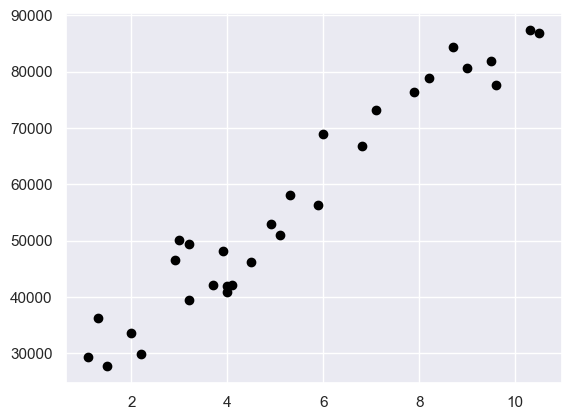

In [ ]:
# Step 1 : Scatter plot of x and y
x = df['YearsExperience'] # indepenent
y = df['Salary'] # dependent on x
plt.scatter(x, y,  color='black')

In [ ]:
X1 = sm.add_constant(x)
model = sm.OLS(y, X1).fit() # first parameter is the one dependent, the next is the intercept which is independent
res = model.resid # the residual degree of freedom
yhat = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     412.4
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           2.72e-18
Time:                        12:37:01   Log-Likelihood:                -296.40
No. Observations:                  30   AIC:                             596.8
Df Residuals:                      28   BIC:                             599.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.162e+04   1921.463     11.254      0.000    1.77e+04    2.56e+04
YearsExperience  6501.7589    320.170     20.307      0.000    5845.921    7157.597
==============================================================================
Omnibus:                        4.321   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.044
Skew:                           0.330   Prob(JB):                        0.360
Kurtosis:                       1.905   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

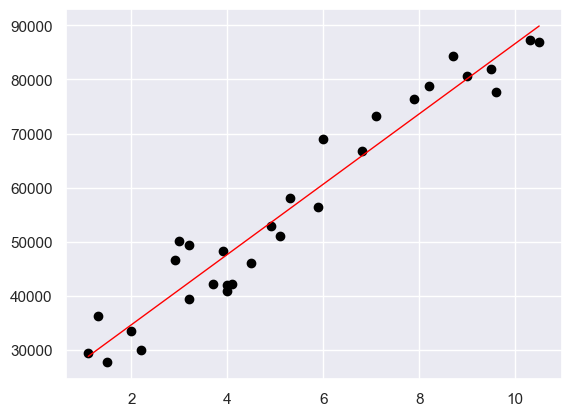

In [ ]:
plt.scatter(x, y,  color='black')
plt.plot(x, yhat, color='red', linewidth=1)

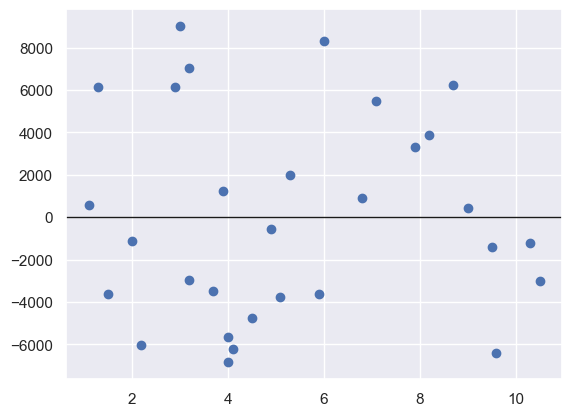

In [ ]:
plt.scatter(x, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

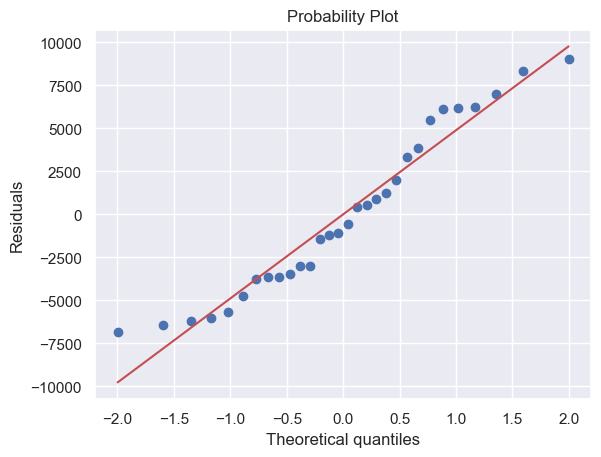

Skewness = 0.3305
Kurtosis = -1.0946


<AxesSubplot:title={'center':'Distribution'}, ylabel='Density'>

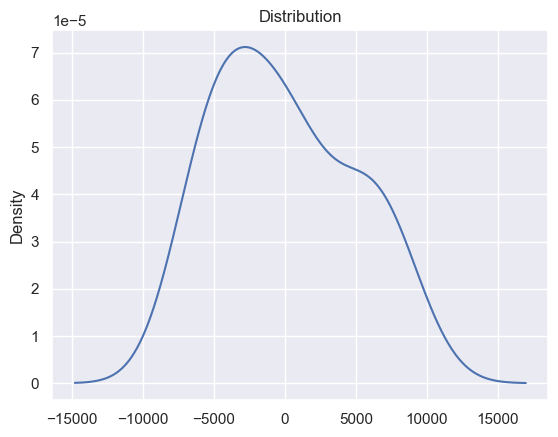

In [ ]:
# This is step 4 for checking assumption that error are normally distributed
# Skeness and kurtosis for residuals
stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution')

In [ ]:
# Step 3 Determine b1 and b0
[b0, b1] = model.params
print("b1 = " + repr(round(model.params[1],4)) + "b0 = " + repr(round(model.params[0],4)))
t = symbols('t')


b1 = 6501.7589b0 = 21623.6544


y = 6501.76x + 21623.65 + error

Step 5 - Assess adequacy of model
H1: B1 is 6501.76

H0: B1 is not 6501.76

In [ ]:
print("Residual sums of squares: " + repr(round(model.ssr,4)))

print("High correlation: " + repr(round(sqrt(model.rsquared),4)))
print("Correlation of determination: " + repr(round(model.rsquared,4)))
n = 31
r = round(sqrt(model.rsquared),4)


Residual sums of squares: 670358729.4427
High correlation: 0.9677
Correlation of determination: 0.9364


In [ ]:
# b

print('A newly employed developer can expect a monthly wage of kr.', round(b0+0*b1, 2))

#c 
print('If a software developer retires after 40 years, he or she will have a wage of kr.',
      round(b0+40*b1, 2))
# No it does not sound plausiable

A newly employed developer can expect a monthly wage of kr. 21623.65
If a software developer retires after 40 years, he or she will have a wage of kr. 281694.01


# Exam 2017

## Assignment 4
An industrial safety program was recently instituted in the computer chip industry. The average weekly 
loss (averaged over 1 month) in labor-hours due to accidents in 10 similar plants both before and after 
the program are as follows:

![image.png](attachment:image.png)

a. Determine whether the safety program has had a significant effect on reducing labor-hours due
to accidents in the 10 plants.

b. Is there evidence to support the claim that the program has had an effect at the 1% level of 
significance?

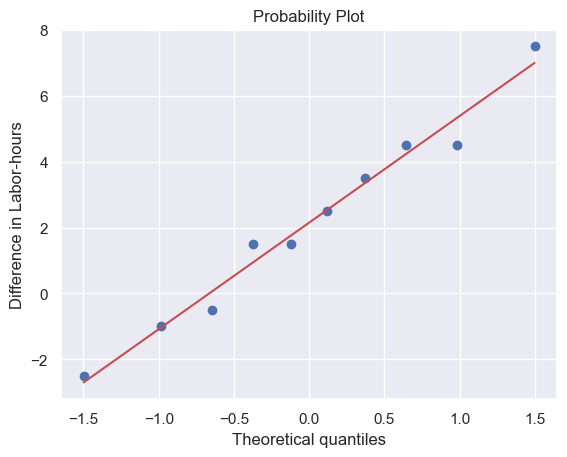

Skewness = 0.1328
Kurtosis = -0.7163


<AxesSubplot:title={'center':'Distribution'}, ylabel='Density'>

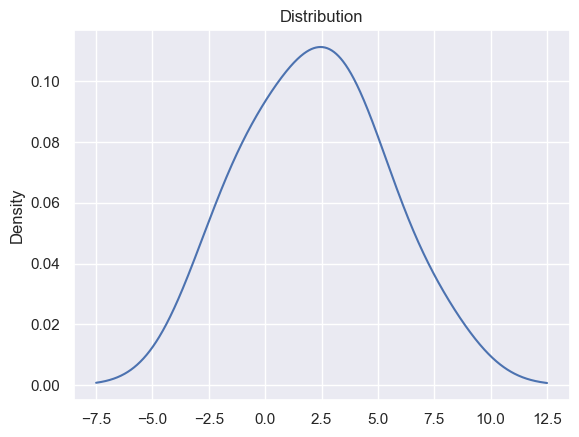

In [ ]:
Before = [30.5, 18.5, 24.5, 32, 16, 15, 23.5, 25.5, 28, 18]
After = [23, 21, 22, 28.5, 14.5, 15.5, 24.5, 21, 23.5, 16.5]
df = pd.DataFrame({'Before': Before,
                'After': After})
# In order to test the effect we have to test the difference between before and after
df['Difference'] = df['Before'] - df['After']
meandiff = np.mean(df['Difference'])


# We check for normality of the differences
stats.probplot(df['Difference'], plot=plt)
plt.ylabel('Difference in Labor-hours')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df['Difference']),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df['Difference']),4)))
fig, ax = plt.subplots()
df['Difference'].plot.kde(ax=ax, legend=False, title='Distribution')

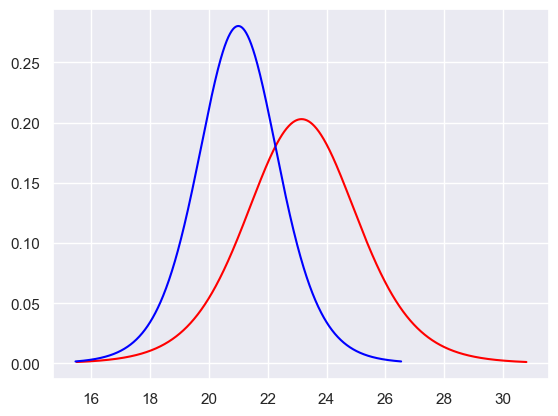

In [ ]:
# A plot with 2 functions, one with before and one with after 
# are good examples of how to test the significance
n1 = len(df['Before'])
SE1 = stats.sem(df['Before'])
mean1 = np.mean(df['Before'])

n2 = len(df['After'])
SE2 = stats.sem(df['After'])
mean2 = np.mean(df['After'])

x1 = np.linspace(mean1-4*SE1, mean1+4*SE1, 1000)
x2 = np.linspace(mean2-4*SE2, mean2+4*SE2, 1000)

y1 = stats.t.pdf(x1, n1-1, mean1, SE1)
y2 = stats.t.pdf(x2, n2-1, mean2, SE2)


plt.plot(x1,y1, color='red')
plt.plot(x2,y2, color='blue')

plt.show()

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
# Calculate the t-test on TWO RELATED samples of scores, a and b.
# This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values
val = stats.ttest_rel(df['Before'], df['After'])
alpha = 0.05
stat = abs(round(val[0],2)) # t statistic
pvalue = round(val[1], 4)/2
crit = abs(round(stats.t.ppf(alpha,n1-1),2))
if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))
# b. The same p value but alpha would have been 0.01, still p value smaller than 0.01 ??? why because 0.02 > 0.01

Reject since 0.02485 < 0.05


## Assignment 5

A recent study among 254 computer science graduates from Aarhus University was made in order to 
determine how successful the former students were in their current employment. 98 of these students 
had taken a course in linear algebra and of these 92 were classified as “successful” in their current 
employment. 136 of the students who had not taken a course in linear algebra were classified as 
“successful” in their current employment.

a. Is the evidence to support the claim that computer science graduates who had taken a linear 
algebra course were more successful in their current employment than those who had not 
taken such a course?

b. Explain the meaning of the p-value obtained in question (a), i.e. what does this probability refer 
to?

In [ ]:
alg = 98
algs = 92
nonalgs = 136
nonalg = 254-alg
# a)
# Since we have two proportions, we can use test of difference between proportions:

val = sm.stats.proportions_ztest([algs, nonalgs], [alg, nonalg], value = None, alternative = 'larger')

stat = abs(round(val[0],2))
pvalue = round(val[1],4)

print(stat)
alpha = 0.05
crit = stats.norm.isf(alpha/2)

if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

1.71
Reject since 0.0432 < 0.05


## Assignment 6

As part of their final project, two ICT students are working on a data warehouse support system. The 
major workload is the warehouse orders. Thus, the key business metric is identified as number of 
order lines. The students want to find a method to predict CPU utilization based on the number of 
order lines entered into the system and have collected 31 samples of CPU utilization and number of 
order line entries

a. Create a complete regression analysis of the data above. Your analysis must include a plot of 
the data, considerations about outliers, estimates for the regression parameters and 
confidence intervals for these, considerations about the assumptions of the model, as well as 
an assessment of the adequacy of the model

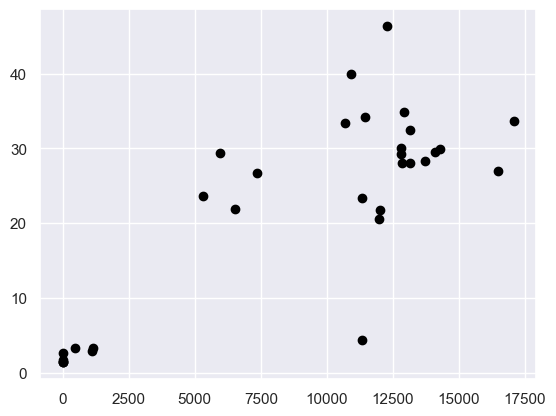

In [ ]:
df = pd.read_excel('assignment6_data.XLSX')
X = df['Unnamed: 2']
y = df['Unnamed: 1']
plt.scatter(X, y,  color='black')

In [ ]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit() # dependent variable first
res = model.resid
yhat = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unnamed: 1   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     58.63
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.92e-08
Time:                        12:37:04   Log-Likelihood:                -107.14
No. Observations:                  31   AIC:                             218.3
Df Residuals:                      29   BIC:                             221.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6291      2.652      1.745      0.092      -0.796      10.054
Unnamed: 2     0.0019      0.000      7.657      0.000       0.001       0.002
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.010
Skew:                           0.000   Prob(JB):                        0.366
Kurtosis:                       4.248   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

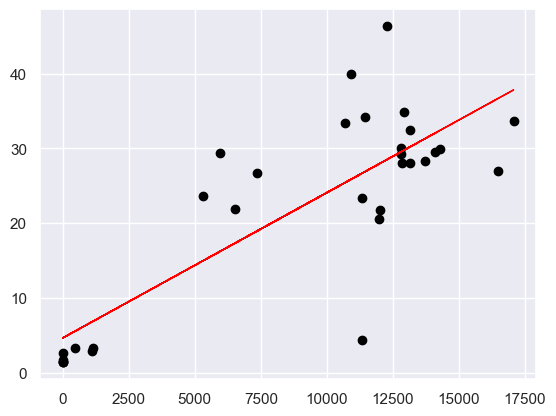

In [ ]:
plt.scatter(X, y,  color='black')
plt.plot(X, yhat, color='red', linewidth=1)

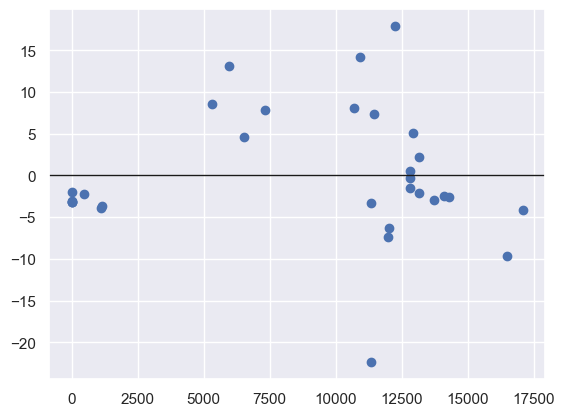

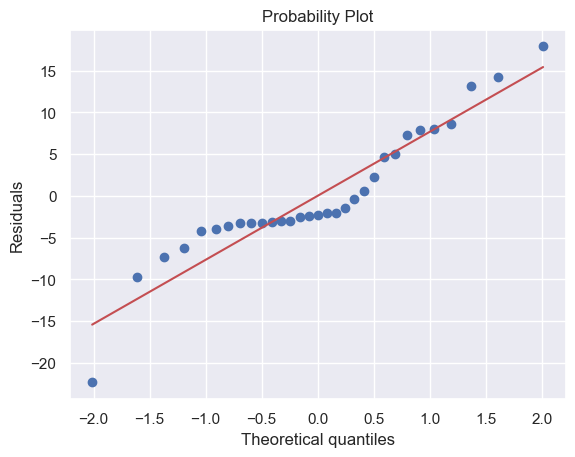

Skewness = 0.0004
Kurtosis = 1.2476


<AxesSubplot:title={'center':'Distribution'}, ylabel='Density'>

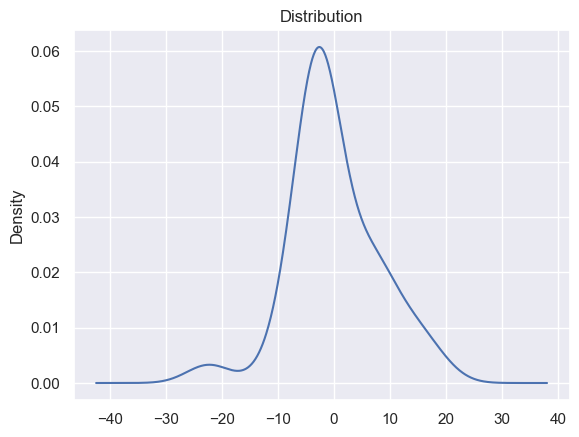

In [ ]:
plt.scatter(X, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution')

# Reexam 2018

## Assignment 4

Two producers of batteries measure the longevity of 30 batteries of the same type, which were 
randomly chosen from a larger batch of such batteries. The lifetime (in hundreds of hours) is 
displayed “Batteries.xlsx”. 

a. Check the dataset for outliers and replace any outliers with the mean lifetime of the 
producer in question. Use this cleaned dataset in the following questions. 

b. Determine estimates for the quartiles, average lifetime, standard deviation and variance 
of each producer’s battery 

c. Setup 95% confidence intervals for each mean battery lifetime from the two producers, 
and accompany the intervals with plots that display the rejection region. 

d. Is it reasonable to conclude that the lifetime of the two producer’s battery follow a 
normal distribution? Explain using plots and discussing skewness and kurtosis. 

e. Setup a 95% confidence interval for the difference between the two producer’s battery, 
and accompany the intervals with plots that display the rejection region. 

f. Is there significant evidence to support the claim that the mean lifetime of the batteries 
from the two producers differ from one another?
 
g. Setup a test to test whether the standard deviations of the two batteries differ 
significantly. 

In [ ]:
df = pd.read_excel('Batteries.xlsx')
df.head()

,Producer 1,Producer 2
0,2.1162,1.1259
1,2.5135,3.1725
2,1.8137,2.4492
3,0.8075,3.7766
4,1.5554,4.4673


In [ ]:
q3, q1 = np.percentile(df['Producer 1'], [75,25])
iqr = q3 - q1
upper = q3+1.5*iqr
lower = q1 - 1.5*iqr
average = df.loc[(df['Producer 1'] < upper) & (df['Producer 1'] > lower)  , 'Producer 1'].mean()
df['Producer 1'] = np.where((df['Producer 1'] > upper) | (df['Producer 1'] < lower), average, df['Producer 1'])

q3, q1 = np.percentile(df['Producer 2'], [75,25])
iqr = q3 - q1
upper = q3+1.5*iqr
lower = q1 - 1.5*iqr
average = df.loc[(df['Producer 2'] < upper) & (df['Producer 2'] > lower)  , 'Producer 2'].mean()
df['Producer 2'] = np.where((df['Producer 2'] > upper) | (df['Producer 2'] < lower), average, df['Producer 2'])

In [ ]:
# b

df1 = df['Producer 1']
df2 = df['Producer 2']

print('Producer 1: ')
print('q1 = ', round(df1.quantile(0.25), 4))
print('q2 = ', round(df1.quantile(0.5), 4))
print('q3 = ', round(df1.quantile(0.75), 4))
print('q4 = ', round(df1.quantile(1), 4))
print('average = ', round(df1.mean(), 4))
print('std = ', round(df1.std(), 4))
print('std = ', round(df1.var(), 4))
print(' ')
print('Producer 2: ')
print('q1 = ', round(df2.quantile(0.25), 4))
print('q2 = ', round(df2.quantile(0.5), 4))
print('q3 = ', round(df2.quantile(0.75), 4))
print('q4 = ', round(df2.quantile(1), 4))
print('average = ', round(df2.mean(), 4))
print('std = ', round(df2.std(), 4))
print('std = ', round(df2.var(), 4))

Producer 1: 
q1 =  1.1888
q2 =  1.9196
q3 =  2.4074
q4 =  3.637
average =  1.9029
std =  0.9109
std =  0.8298
 
Producer 2: 
q1 =  2.0375
q2 =  2.5158
q3 =  3.0069
q4 =  4.4673
average =  2.4776
std =  0.9124
std =  0.8325


An 95.0 % upper confidence interval for the sample mean of producer 1 is [1.56; 2.24]


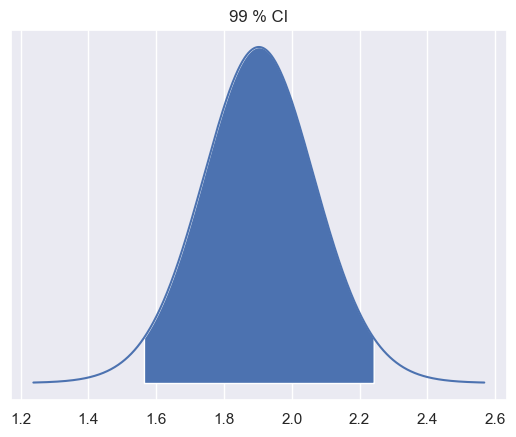

An 95.0 % upper confidence interval for the sample mean of producer 2 is [2.14; 2.82]


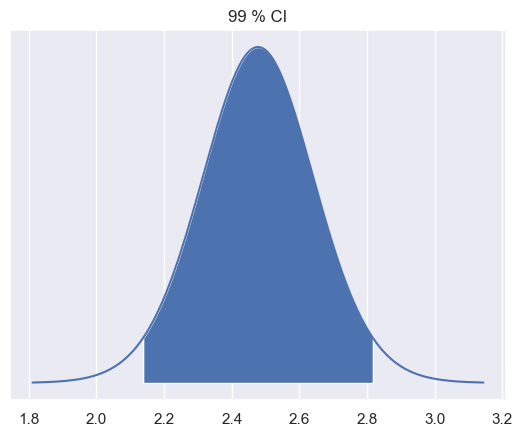

In [ ]:
# c) Using t.interval
# Producer 1
from scipy import stats
n = len(df1)
mean = np.mean(df1)
SE = stats.sem(df1)
Level = 0.95

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100) + ' % upper confidence interval for the sample mean of producer 1 is ['
      + repr(round(CI[0],2)) + '; ' + repr(round(CI[1],2)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)
draw_t_score(x, n-1, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')

# Producer 2
n = len(df2)
mean = np.mean(df2)
SE = stats.sem(df2)
Level = 0.95

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100) + ' % upper confidence interval for the sample mean of producer 2 is ['
      + repr(round(CI[0],2)) + '; ' + repr(round(CI[1],2)) + ']')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)
draw_t_score(x, n-1, (CI[0] <= x) & (x <= CI[1]), mean, SE, '99 % CI')

95% Confidence Interval mean Producer 1: [1.56, 2.24]


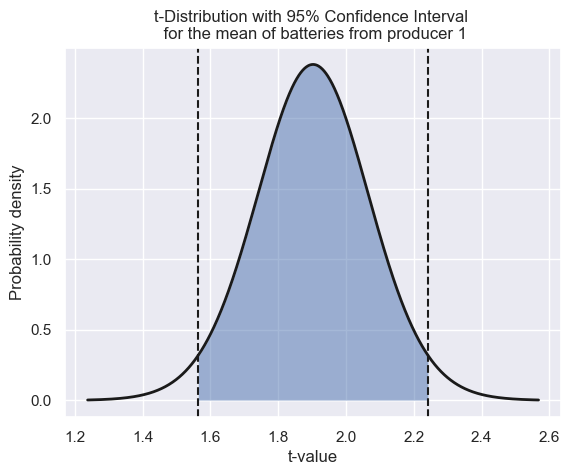

95% Confidence Interval mean Producer 2: [2.14, 2.82]


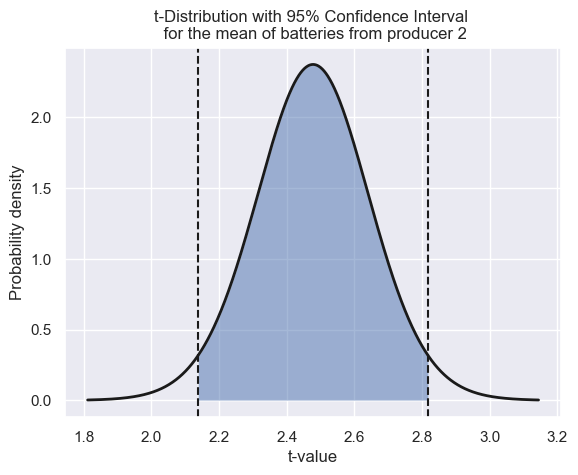

In [ ]:
# c Method 2
# Producer 1
# Using the formula
data = df1

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev

# Calculate the standard error of the mean
std_error = std_dev / np.sqrt(len(data))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
dof = len(data) - 1

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Calculate the confidence interval for the mean
# THESE ARE THE UPPER AND LOWER BOUNDRIES OF THE SET OF DATA
lower = mean - t_crit * std_error
upper = mean + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval mean Producer 1: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(mean-4*std_error, mean+4*std_error, 1000)
y = stats.t.pdf(x,dof, mean, std_error)
plt.plot(x, y, 'k', linewidth=2)
shade = np.linspace(lower, upper, 300)
plt.fill_between(shade, stats.t.pdf(shade, dof, mean, std_error), alpha=0.5)
plt.axvline(x=lower, linestyle='--', color='k')
plt.axvline(x=upper, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval \n for the mean of batteries from producer 1")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()

# Producer 2
data = df2

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev

# Calculate the standard error of the mean
std_error = std_dev / np.sqrt(len(data))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
dof = len(data) - 1

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Calculate the confidence interval for the mean
lower = mean - t_crit * std_error
upper = mean + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval mean Producer 2: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(mean-4*std_error, mean+4*std_error, 1000)
y = stats.t.pdf(x,dof, mean, std_error)
plt.plot(x, y, 'k', linewidth=2)
shade = np.linspace(lower, upper, 300)
plt.fill_between(shade, stats.t.pdf(shade, dof, mean, std_error), alpha=0.5)
plt.axvline(x=lower, linestyle='--', color='k')
plt.axvline(x=upper, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval \n for the mean of batteries from producer 2")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()

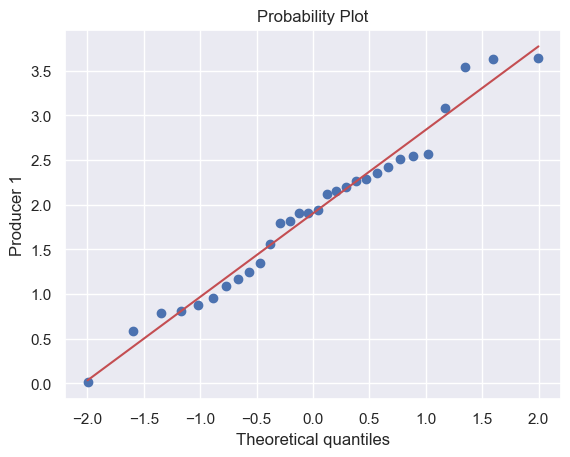

Skewness = 0.1134
Kurtosis = -0.4326


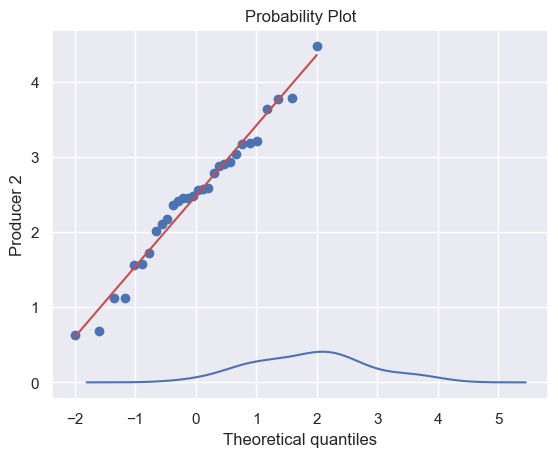

Skewness = -0.1821
Kurtosis = -0.19


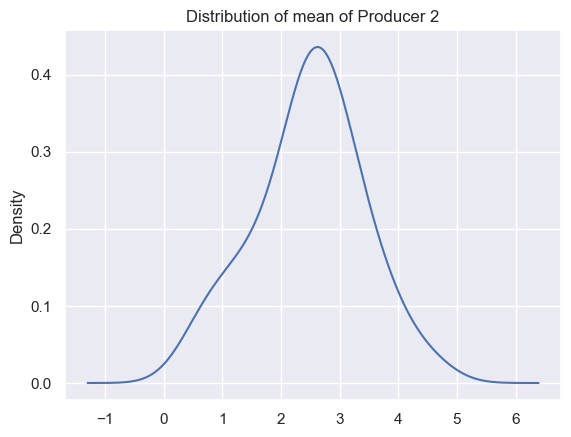

In [ ]:
# d

# d)
stats.probplot(df1, plot=plt)
plt.ylabel('Producer 1')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df1),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df1),4)))
fig, ax = plt.subplots()
df1.plot.kde(ax=ax, legend=False, title='Distribution of mean of Producer 1')


stats.probplot(df2, plot=plt)
plt.ylabel('Producer 2')
plt.show()
print('Skewness = ' + repr(round(stats.skew(df2),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(df2),4)))
fig, ax = plt.subplots()
df2.plot.kde(ax=ax, legend=False, title='Distribution of mean of Producer 2');

95% Confidence Interval for the Difference in Means: [-1.05, -0.10]


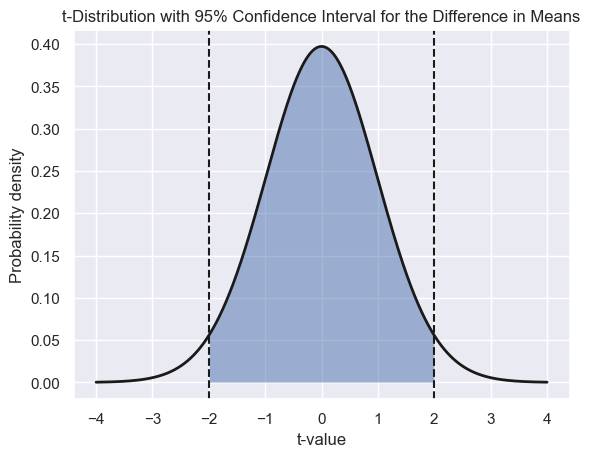

In [ ]:
# e
# Generate some sample data for two independent samples (replace this with your own data)
data1 = df1
data2 = df2

# Calculate the mean and standard deviation of the data
mean1 = np.mean(data1)
mean2 = np.mean(data2)
std_dev1 = np.std(data1, ddof=1)  # ddof=1 gives an unbiased estimator of the population std dev
std_dev2 = np.std(data2, ddof=1)

# Calculate the standard error of the difference in means
std_error = np.sqrt((std_dev1 ** 2 / len(data1)) + (std_dev2 ** 2 / len(data2)))

# Set the significance level and degrees of freedom for the t-distribution
alpha = 0.05  # 95% confidence level
df = len(data1) + len(data2) - 2

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, df)

# Calculate the confidence interval for the difference in means
diff = mean1 - mean2
lower = diff - t_crit * std_error
upper = diff + t_crit * std_error

# Print the confidence interval
print("95% Confidence Interval for the Difference in Means: [{:.2f}, {:.2f}]".format(lower, upper))

# Plot the t-distribution with the rejection region shaded
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)
plt.plot(x, y, 'k', linewidth=2)
shade1 = np.linspace(-t_crit, t_crit, 300)
plt.fill_between(shade1, stats.t.pdf(shade1, df), alpha=0.5)
plt.axvline(x=t_crit, linestyle='--', color='k')
plt.axvline(x=-t_crit, linestyle='--', color='k')
plt.title("t-Distribution with 95% Confidence Interval for the Difference in Means")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()

Reject since  0.0177  <  0.05


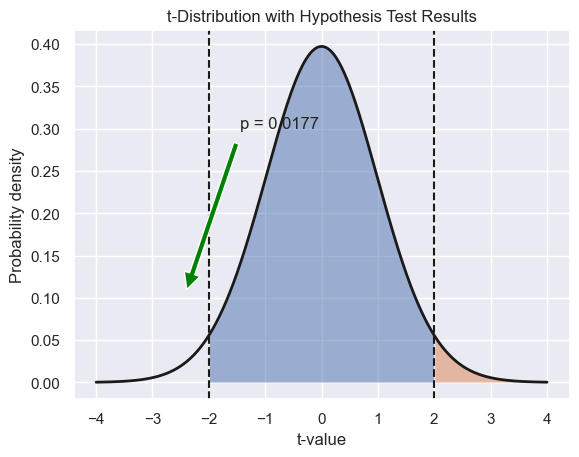

In [ ]:
# f. Is there significant evidence to support the claim that the mean lifetime of the batteries from the two producers differ from one another?
# mean, data sets,alpha, std dev for each are the same, so taken from previous cell

# Perform a two-sample t-test with equal variances
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)

# Calculate the critical t-value for the two-tailed t-test
t_crit = stats.t.ppf(1 - alpha/2, len(data1) + len(data2) - 2)

# Print the results of the hypothesis test
if p_value < alpha:
    print("Reject since ", round(p_value, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(p_value, 4) , '\u2265' , alpha)


# Plot the t-distribution with the rejection region shaded
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, len(data1) + len(data2) - 2)
plt.plot(x, y, 'k', linewidth=2)
shade1 = np.linspace(-t_crit, t_crit, 300)
shade2 = np.linspace(t_crit, 4, 300)
plt.fill_between(shade1, stats.t.pdf(shade1, len(data1) + len(data2) - 2), alpha=0.5)
plt.fill_between(shade2, stats.t.pdf(shade2, len(data1) + len(data2) - 2), alpha=0.5) # this is the red area
plt.axvline(x=t_crit, linestyle='--', color='k')
plt.axvline(x=-t_crit, linestyle='--', color='k')

# Add an arrow pointing to the position on the x-axis where the p-value lies
if p_value < alpha/2:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat + 1, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))
elif p_value > 1 - alpha/2:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat - 1, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))
else:
    plt.annotate("p = {:.4f}".format(p_value), xy=(t_stat, 0.1), xytext=(t_stat, 0.3),
                 arrowprops=dict(facecolor='green', shrink=0.05))

plt.title("t-Distribution with Hypothesis Test Results")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.show()


In [ ]:
# g. Setup a test to test whether the standard deviations of the two batteries differ significantly. 
# mean, data sets,alpha, std dev for each are the same, so taken from previous cell

#F test is a statistical test that is used in hypothesis testing to check whether the variances of two populations or two samples are equal or not. 
var1 = np.var(data1, ddof=1)  # ddof=1 gives an unbiased estimator of the population variance
var2 = np.var(data2, ddof=1)

# Perform a two-sample F-test to test the null hypothesis that the standard deviations are equal
F_stat = var1 / var2
F_crit1 = stats.f.ppf(alpha/2, len(data1)-1, len(data2)-1)
F_crit2 = stats.f.ppf(1-alpha/2, len(data1)-1, len(data2)-1)

# Print the results of the hypothesis test
if F_stat < F_crit1 or F_stat > F_crit2:
    print("Reject the null hypothesis: the standard deviations are different")
else:
    print("Fail to reject the null hypothesis: the standard deviations are not different")



Fail to reject the null hypothesis: the standard deviations are not different
